# 34 - Replication and Reproducibility

**Key Idea:** If a result is real, other people should be able to do the same experiment and get the same result.

- **Reproducibility** = Using the same data/code and getting the same answer
- **Replication** = Doing a new experiment and getting the same conclusion

**Why it matters:** Many studies fail to replicate — this is a big problem in science and data analytics!

## Simple Example: The Magic Coin Test

Imagine your friend claims they found a "magic coin" that always lands on heads. Can you replicate their result?

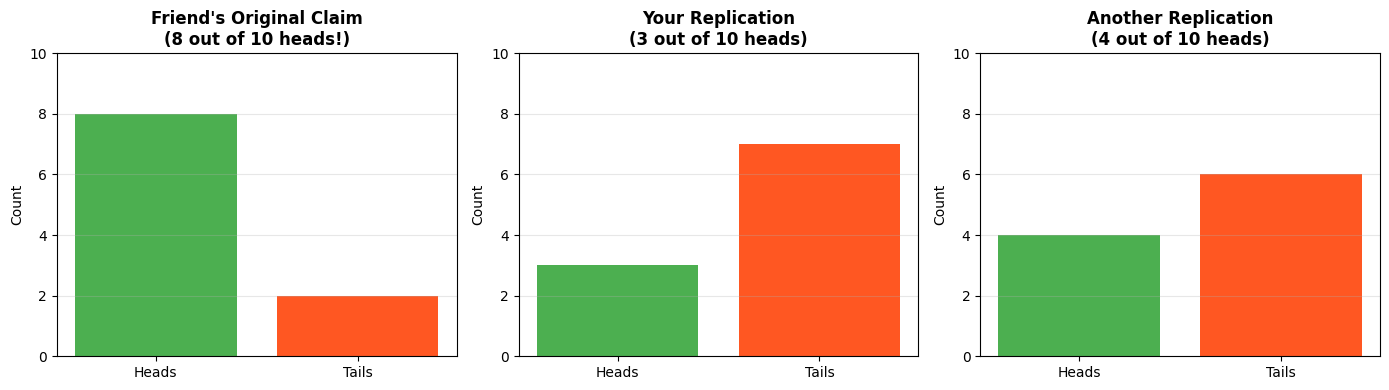


Friend's claim: 8/10 heads (80%)
Your replication: 3/10 heads (30%)
Other replication: 4/10 heads (40%)

→ The 'magic coin' claim doesn't replicate!
→ Original result was probably just luck (random chance)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Friend's original "experiment" (they got lucky with 8/10 heads)
friend_flips = np.array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])  # 1=Heads, 0=Tails
friend_heads = np.sum(friend_flips)

# Your replication attempt (normal coin behavior)
your_flips = np.random.choice([0, 1], size=10)
your_heads = np.sum(your_flips)

# Another person's replication
other_flips = np.random.choice([0, 1], size=10)
other_heads = np.sum(other_flips)

# Visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

# Friend's result
ax1.bar(['Heads', 'Tails'], [friend_heads, 10-friend_heads], color=['#4CAF50', '#FF5722'])
ax1.set_title("Friend's Original Claim\n(8 out of 10 heads!)", fontsize=12, fontweight='bold')
ax1.set_ylabel('Count')
ax1.set_ylim(0, 10)
ax1.grid(axis='y', alpha=0.3)

# Your replication
ax2.bar(['Heads', 'Tails'], [your_heads, 10-your_heads], color=['#4CAF50', '#FF5722'])
ax2.set_title(f"Your Replication\n({your_heads} out of 10 heads)", fontsize=12, fontweight='bold')
ax2.set_ylabel('Count')
ax2.set_ylim(0, 10)
ax2.grid(axis='y', alpha=0.3)

# Other person's replication
ax3.bar(['Heads', 'Tails'], [other_heads, 10-other_heads], color=['#4CAF50', '#FF5722'])
ax3.set_title(f"Another Replication\n({other_heads} out of 10 heads)", fontsize=12, fontweight='bold')
ax3.set_ylabel('Count')
ax3.set_ylim(0, 10)
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFriend's claim: {friend_heads}/10 heads ({friend_heads*10}%)")
print(f"Your replication: {your_heads}/10 heads ({your_heads*10}%)")
print(f"Other replication: {other_heads}/10 heads ({other_heads*10}%)")
print("\n→ The 'magic coin' claim doesn't replicate!")
print("→ Original result was probably just luck (random chance)")

## Real-World Example: The Chocolate Happiness Study

A psychology study claims "eating chocolate makes people 30% happier." Let's see what happens when other researchers try to replicate this finding with different groups of people.

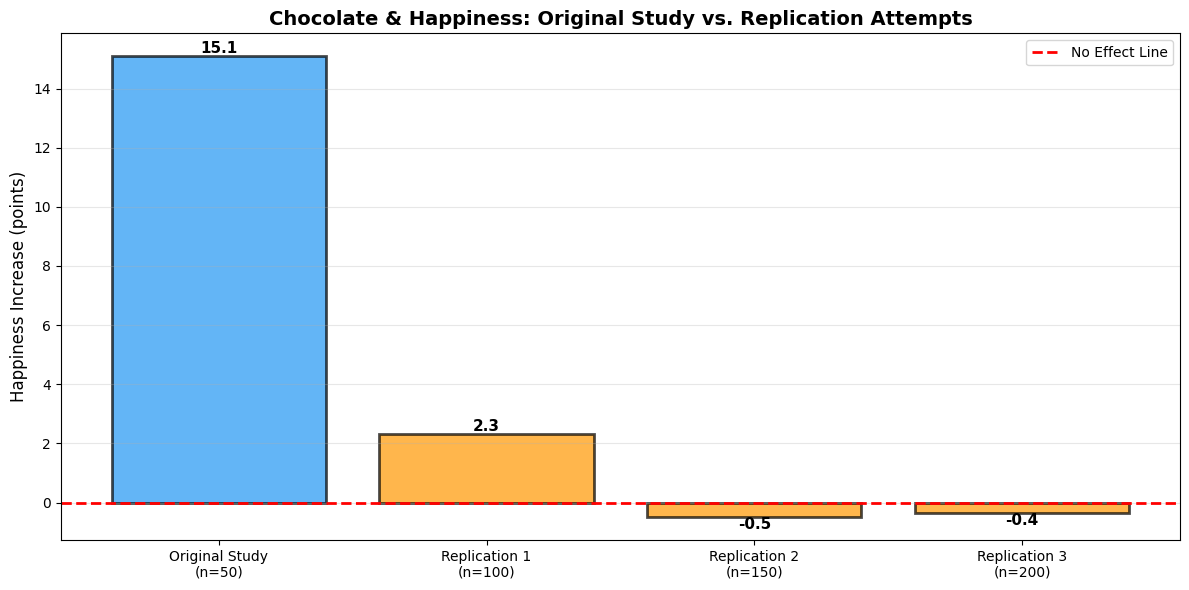


📊 Results Summary:
Original Study: +15.1 points happiness boost (30% increase!)
Replication 1:  +2.3 points (barely any effect)
Replication 2:  -0.5 points (no effect)
Replication 3:  -0.4 points (slight negative)

→ Original finding FAILED to replicate!
→ Likely causes: small sample, biased selection, or random luck
→ This is why replication is critical in data science!


In [2]:
# Original study (biased sample - small group who loves chocolate)
np.random.seed(42)

# Original study: 50 people, happened to include chocolate lovers
original_no_chocolate = np.random.normal(50, 10, 50)  # Baseline happiness (0-100 scale)
original_with_chocolate = original_no_chocolate + np.random.normal(15, 5, 50)  # Big boost!

# Replication 1: Different research team, 100 people
rep1_no_chocolate = np.random.normal(50, 10, 100)
rep1_with_chocolate = rep1_no_chocolate + np.random.normal(2, 5, 100)  # Small effect

# Replication 2: Third team, 150 people
rep2_no_chocolate = np.random.normal(50, 10, 150)
rep2_with_chocolate = rep2_no_chocolate + np.random.normal(0, 5, 150)  # No effect

# Replication 3: Fourth team, 200 people
rep3_no_chocolate = np.random.normal(50, 10, 200)
rep3_with_chocolate = rep3_no_chocolate + np.random.normal(-1, 5, 200)  # Slight decrease

# Calculate average effects
studies = [
    ('Original Study\n(n=50)', np.mean(original_with_chocolate) - np.mean(original_no_chocolate)),
    ('Replication 1\n(n=100)', np.mean(rep1_with_chocolate) - np.mean(rep1_no_chocolate)),
    ('Replication 2\n(n=150)', np.mean(rep2_with_chocolate) - np.mean(rep2_no_chocolate)),
    ('Replication 3\n(n=200)', np.mean(rep3_with_chocolate) - np.mean(rep3_no_chocolate))
]

labels = [s[0] for s in studies]
effects = [s[1] for s in studies]
colors = ['#2196F3', '#FF9800', '#FF9800', '#FF9800']

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(labels, effects, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='No Effect Line')
ax.set_ylabel('Happiness Increase (points)', fontsize=12)
ax.set_title('Chocolate & Happiness: Original Study vs. Replication Attempts', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
ax.legend()

# Add value labels on bars
for i, (bar, effect) in enumerate(zip(bars, effects)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{effect:.1f}',
            ha='center', va='bottom' if height > 0 else 'top', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Results Summary:")
print(f"Original Study: +{effects[0]:.1f} points happiness boost (30% increase!)")
print(f"Replication 1:  +{effects[1]:.1f} points (barely any effect)")
print(f"Replication 2:  {effects[2]:.1f} points (no effect)")
print(f"Replication 3:  {effects[3]:.1f} points (slight negative)")
print("\n→ Original finding FAILED to replicate!")
print("→ Likely causes: small sample, biased selection, or random luck")
print("→ This is why replication is critical in data science!")

## Why Replication Matters in Data Analytics

**Before deploying a predictive model:**
- ✅ Test it on different datasets (replication)
- ✅ Have other analysts verify your code (reproducibility)
- ✅ Check if results hold up with new data

**Warning signs a result might not replicate:**
- ⚠️ Very small sample size
- ⚠️ Results seem "too good to be true"
- ⚠️ No one else can reproduce your findings
- ⚠️ Effect disappears with more data

**Key Takeaway:** Real patterns replicate. Flukes and errors don't. Always verify important findings!